# The Large Survey Database

The Large Survey Database (LSD) is an open-source NoSQL (but still SQL-ish) framework for storing, cross-matching, querying, and rapidly iterating through large astronomical survey datasets (catalogs of $>10^9$ rows, >1 TB) on multi-core machines.

The documentation for LSD is at http://lsddb.org

## Installing the Large Survey Database (LSD)

## Linux only!

For now, LSD only works on Linux (though Mac support should be fairly trivial to add).

### LSD on magneto

I've installed LSD on `magneto.astro.washington.edu`, into our Anaconda environment.

The catalogs we will work with reside in `/astro/apps6/opt/lsddb`

### Installing LSD with Anaconda

If you're using the Anaconda Python Distribution, installing LSD is very easy:

In [1]:
! conda config --add channels http://www.astro.washington.edu/users/mjuric/conda

Skipping channels: http://www.astro.washington.edu/users/mjuric/conda, item already exists


In [2]:
! conda install lsd --yes

Fetching package metadata: ......
Solving package specifications: ......................
# All requested packages already installed.
# packages in environment at /astro/apps6/opt/anaconda2.4:
#
lsd                       0.6.1.1                  py27_0    http://www.astro.washington.edu/users/mjuric/conda/linux-64/lsd-0.6.1.1-py27_0.tar.bz2


Now create the directory where we will store our LSD database tables (catalogs):

In [3]:
! mkdir -p /astro/apps6/opt/lsddb

In the next step, we will point the environmental variable LSD_DB to this directory. This is how LSD command line utilities know how to find your databases.

In [4]:
import os
os.environ["LSD_DB"] = "/astro/apps6/opt/lsddb"

If you were running this from your shell, you'd simply do:
```
export LSD_DB=/astro/apps6/opt/lsddb     # for bash/dash/sh/zsh/ksh
```
or
```
setenv LSD_DB /astro/apps6/opt/lsddb     # for csh/tcsh
```

The command-line workhorse of LSD is `lsd-query`. We can test whether the install worked by trying to invoke it:

In [5]:
! lsd-query --version

Large Survey Database, version 


In [6]:
! echo $LSD_DB

/astro/apps6/opt/lsddb


In [8]:
! ls -l $LSD_DB

total 0


Find out where LSD is installed. This will come in handy later.

In [9]:
# This is a bit of a hack -- we use the fact that we know that lsd-query will be installed in $LSD_DIR/bin/lsd-query
lq = ! dirname $(dirname $(which lsd-query))
LSD_DIR = lq[0]
print LSD_DIR

/astro/apps6/opt/anaconda2.4


## Obtaining catalogs

### Creating tables and importing catalogs

The command line utility to use to create and manage LSD tables is called `lsd-admin`.

In [10]:
! lsd-admin -h

usage: lsd-admin [-h] [--db DB] {create,desc,drop,vacuum,remote} ...

Administer an LSD databases

positional arguments:
  {create,desc,drop,vacuum,remote}
    create              Create objects in the database
    desc                Show info about tables and other objects in the database
    drop                Delete database tables and objects
    vacuum              Reclaim unused/wasted database space
    remote              Administer remote database access

optional arguments:
  -h, --help            show this help message and exit
  --db DB               Path to LSD database

Examples:
	lsd-admin create table ....
.


In [11]:
! lsd-admin create -h

usage: lsd-admin create [-h] {table} ...

positional arguments:
  {table}
    table     Create a table

optional arguments:
  -h, --help  show this help message and exit


In [12]:
! lsd-admin create table -h

usage: lsd-admin create table [-h] [--primary-key PRIMARY_KEY] [--spatial-keys SPATIAL_KEYS] [--temporal-key TEMPORAL_KEY] [--exposure-key EXPOSURE_KEY]
                              [--no-neighbor-cache NO_NEIGHBOR_CACHE] [--schema-module SCHEMA_MODULE] [--schema SCHEMA] [--comp {blosc,zlib,none}] [--comp-level COMP_LEVEL]
                              [--group GROUP] [--drop-existing]
                              table [column_def [column_def ...]]

positional arguments:
  table                 Name of the table to create
  column_def            A column definition, in the form of NAME:TYPE, where TYPE is a string that will be passed to np.dtype

optional arguments:
  -h, --help            show this help message and exit
  --primary-key PRIMARY_KEY
                        Primary key
  --spatial-keys SPATIAL_KEYS
                        Spatial keys
  --temporal-key TEMPORAL_KEY
                        Temporal key
  --exposure-key EXPOSURE_KEY
                        Exposure key
 

#### Table schemas

The structure of an LSD table (the columns it has, their data type and their meaning) is written in a human-readable format called YAML (Yet Another Markup Language; http://yaml.org).

A few examples are distributed with the LSD source:

In [13]:
! ls -l $LSD_DIR/share/lsd/schemas

total 12
-rw-rw-r-- 2 mjuric astro-apps6 1375 Jan 27 22:27 galex.map
-rw-rw-r-- 2 mjuric astro-apps6 1560 Jan 27 22:27 galex.yaml
-rw-rw-r-- 2 mjuric astro-apps6  493 Jan 27 22:27 usnob.yaml


In [14]:
! cat $LSD_DIR/share/lsd/schemas/galex.yaml

# Schema for GALEX GR5 table
filters: {complevel: 5, complib: blosc}
schema:
  common:
    primary_key: galex_id
    spatial_keys: [ra, dec]
    columns:
    - [galex_id, u8]
    - [objid, u8]
    - [ra, f8]
    - [dec, f8]
    - [glon, f8]
    - [glat, f8]
    - [fov_radius, f4]
    - [objtype, i2]
    - [e_bv, f4]
    - [fuv_mag, f4]
    - [fuv_magerr, f4]
    - [nuv_mag, f4]
    - [nuv_magerr, f4]
    - [photoextractid, u8]
  astrometry:
    columns:
    - [fuv_x_image, f4]
    - [fuv_y_image, f4]
    - [nuv_x_image, f4]
    - [nuv_y_image, f4]
    - [fuv_fwhm_image, f4]
    - [nuv_fwhm_image, f4]
    - [fuv_fwhm_world, f4]
    - [nuv_fwhm_world, f4]
  photoextra:
    columns:
    - [fuv_mag_best, f4]
    - [fuv_magerr_best, f4]
    - [nuv_mag_best, f4]
    - [nuv_magerr_best, f4]
    - [fuv_mag_auto, f4]
    - [fuv_magerr_auto, f4]
    - [nuv_mag_auto, f4]
    - [nuv_magerr_auto, f4]
    - [fuv_mag_aper_4, f4]
    - [fuv_magerr_aper_4, f4]
    - [nuv_mag_aper_4, f4]
    - [nuv_mage

In the YAML schema above, the first level down in the `schema` dict lists the column groups (named `common`, `astrometry`, `photoextra`, and `survey`).

Columns are specified one level further down in the `columns` list. Each entry is a simple two-element arrays with the column name and a column type (written in numpy's [dtype style](http://docs.scipy.org/doc/numpy/reference/generated/numpy.dtype.html)).

Each column group must also have a column designates as the `primary_key`; this column will be used internally by LSD to identify each row in the table. A `spatial_key` pair needs to be specified as well -- these are always the two columns with `ra` and `dec`.

#### Creating the GALEX GR5 table

In [15]:
! lsd-admin create table --schema=$LSD_DIR/share/lsd/schemas/galex.yaml galex_gr5


-------- committing 20160128205857.089693 [galex_gr5] ---------
[galex_gr5] Updating tablet catalog: [256 el.]::::::::::::::::::::>  0.31 sec
[galex_gr5] Updating neighbors: Already up to date.
[galex_gr5] Updating tablet catalog: [256 el.]::::::::::::::::::::>  0.31 sec
[galex_gr5] Updating stats: [0 el.]>  0.00 sec
[galex_gr5] Marking tablets read-only...
----------- success 20160128205857.089693 [galex_gr5] ---------

Table 'galex_gr5' created.


#### Importing the GALEX MIS catalog from a directory of gzipped csv files (~8.7 GB)

As an example, we'll load the catalog of unique sources from the GALEX GR5 AIS survey, available from http://archive.stsci.edu/prepds/bianchi_gr5xdr7/catalogUV.html?print=1. This catalog comes in the form of four ~1.6G to 2.3G tar files that contain a number of individual zipped CSV files.

So that you're able to follow, I've extracted a few an placed them at http://lsst-web.ncsa.illinois.edu/~mjuric/galex_gr5/

In [16]:
RAW_DATA="/astro/users/mjuric/astr597b"
! ls -l $RAW_DATA

total 0
drwxrwxr-x 3 mjuric mjuric 16 Jan 28 00:01 galex_gr5


In [17]:
! ls $RAW_DATA/galex_gr5/AIS | head

GR5_0_1S.csv.gz
GR5_10_11S.csv.gz
GR5_10_9N.csv.gz
GR5_1_0N.csv.gz
GR5_11_10N.csv.gz
GR5_11_12S.csv.gz
GR5_12_11N.csv.gz
GR5_12_13S.csv.gz
GR5_1_2S.csv.gz
GR5_13_12N.csv.gz


In [18]:
! zcat $RAW_DATA/galex_gr5/AIS/GR5_0_1S.csv.gz | head -n 1

6372886139376763380,67.5674187876501,46.9782956554715,156.7785,-0.9997115,50056,1761,55,0.361855,1,1,1.852059,False,-999,-999,-999,-999,22.58097,0.457094,0,-1,2.500967,0.457094,-99,-99,2.500967,0.457094,-99,-99,2.317665,0.4927053,-99,-99,2.759354,1.436903,0,0,0,0,-999,-999,3.362405,1.415226,-99,-99,2220.774,1096.961,-99,5.596932,-99,0.002332055,6372886139375714304,AIS,67.7442444590054,47.3195831696497

gzip: stdout: Broken pipe


The input files contain comma-separated values with no header row. If left unspecified, LSD assumes the columns in the file map  onto the columns in the table in the same order.

If that is not the case, we need to specify the mapping either on the command line, or (better) by using a *map file*:

In [19]:
! head $LSD_DIR/share/lsd/schemas/galex.map

objid                  1
ra                     2
dec                    3
glon                   4
glat                   5
fov_radius             9
objtype               14
e_bv                  12
fuv_mag               16
fuv_magerr            17


Note that the column indices in the map file are 1-based.

We're now ready to do the import:

In [20]:
import os.path

os.environ["NWORKERS"] = "8"
os.environ["LSD_CACHEDIR"] = os.path.join(os.environ["HOME"], "lsd-tempdir")
os.environ["LSD_TEMPDIR"] = os.environ["LSD_CACHEDIR"]

! mkdir -p $LSD_CACHEDIR

In [21]:
! lsd-import text --force -d , galex_gr5 \
    --cols-file=$LSD_DIR/share/lsd/schemas/galex.map \
    $RAW_DATA/galex_gr5/AIS/*.csv.gz

Importing from 22 pieces:
  ===> Imported /astro/users/mjuric/astr597b/galex_gr5/AIS/GR5_1_0N.csv.gz             [1/22,  4.55%] +   8180/8186         8180 (0/1 min.)
  ===> Imported /astro/users/mjuric/astr597b/galex_gr5/AIS/GR5_1_2S.csv.gz             [2/22,  9.09%] +   8040/8044        16220 (0/0 min.)
  ===> Imported /astro/users/mjuric/astr597b/galex_gr5/AIS/GR5_10_11S.csv.gz           [3/22, 13.64%] + 190899/190983     207119 (0/3 min.)
  ===> Imported /astro/users/mjuric/astr597b/galex_gr5/AIS/GR5_11_12S.csv.gz           [4/22, 18.18%] + 265223/265368     472342 (0/3 min.)
  ===> Imported /astro/users/mjuric/astr597b/galex_gr5/AIS/GR5_12_13S.csv.gz           [5/22, 22.73%] + 335423/335576     807765 (1/3 min.)
  ===> Imported /astro/users/mjuric/astr597b/galex_gr5/AIS/GR5_10_9N.csv.gz            [6/22, 27.27%] + 331909/332037    1139674 (1/2 min.)
  ===> Imported /astro/users/mjuric/astr597b/galex_gr5/AIS/GR5_13_14S.csv.gz           [7/22, 31.82%] + 338540/338687    1478214 (1/2 

Let's take a look at the results:

In [19]:
! lsd-admin desc table galex_gr5

Path:          /astro/apps6/opt/lsddb/galex_gr5
Partitioning:  level=6
(t0, dt):      54335.000000, 1.000000 
Rows:          64932472
Columns:       56
Primary key:   galex_id
Spatial keys:  (ra, dec)
Aliases:       []
Column groups: ['common', 'astrometry', 'photoextra', 'survey']
-------------------------------
Column group 'common':
              Column       Type
-------------------------------
            galex_id         u8
               objid         u8
                  ra         f8
                 dec         f8
                glon         f8
                glat         f8
          fov_radius         f4
             objtype         i2
                e_bv         f4
             fuv_mag         f4
          fuv_magerr         f4
             nuv_mag         f4
          nuv_magerr         f4
      photoextractid         u8
-------------------------------
-------------------------------
Column group 'astrometry':
              Column       Type
---------------------------

We'll also run a simple query to verify everything went well:

In [20]:
! lsd-query --bounds='beam(200, 40, 0.05)' 'select ra, dec from galex_gr5'

 [1 el.]# ra dec
200.04181256  40.03587815
200.01544321  40.03985440
200.00277167  40.04305844
200.04301683  40.02616514
199.98732057  40.04468333
200.00715855  40.03633683
200.00200786  40.03390349
199.97665652  40.03796833
200.00328418  40.02489863
199.96540620  40.03540704
199.98759011  40.02474009
200.05094582  39.99850505
199.95872222  40.03320993
200.06333921  39.99205481
200.01753157  40.00905797
199.97098001  40.02651409
200.01638162  40.00683932
199.97150144  40.01562935
200.04897906  39.98308925
199.96764276  40.01401267
200.04633688  39.98063260
199.99545478  39.99948083
200.01283361  39.98839250
200.03133776  39.98075725
199.98572537  39.99559341
200.01998175  39.97952577
199.97686564  39.99094654
199.99107164  39.98123792
::::::::::::::::::::>  0.22 sec
28 rows selected.


### Fetching from remote LSD servers

Tables can also be fetched from remote LSD servers. First, we need to tell LSD about the address of a remote server and the table we wish to follow:

In [74]:
! lsd-admin remote follow table http://faun.rc.fas.harvard.edu/mjuric/db/public sdss

Table 'sdss' follows remote table 'http://faun.rc.fas.harvard.edu/mjuric/db/public/sdss'


Then, we can either query the table right away -- for example:

In [21]:
! lsd-query --bounds='beam(200, 40, 0.01)' 'select ra, dec from sdss'

 [1 el.]# ra dec
200.00338260  39.99759555
199.99647699  40.00741186
199.99511395  39.99939921
199.99955972  39.99619678
::::::::::::::::::::>  0.26 sec
4 rows selected.


When we run a query against a remote table, the pieces needed to answer the query are downloaded and cached locally:

In [22]:
! ls $LSD_DB

galex_gr5  sdss  usnob


In [79]:
! du -h --max-depth=1 $LSD_DB/sdss

4.0K	/astro/apps6/opt/lsddb/sdss/snapshots
8.0M	/astro/apps6/opt/lsddb/sdss/tablets
8.2M	/astro/apps6/opt/lsddb/sdss


Let's add more columns to the query:

In [80]:
! lsd-query --bounds='beam(200, 40, 0.01)' 'select * from sdss'

 [1 el.]# sdss_id ra dec l b type flags flags2 resolve_status u uErr uExt uCalib g gErr gExt gCalib r rErr rExt rCalib i iErr iExt iCalib z zErr zExt zCalib run camcol field objid
 5556351224640585380 200.00338260  39.99759555 100.02322715  75.83328464           6   268435968          16    257  23.268   0.620   0.071      1  21.931   0.072   0.052      1  20.468   0.029   0.038      1  19.268   0.018   0.029      1  18.561   0.030   0.020      1        3900           6         451         573
 5556351224640585450 199.99647699  40.00741186 100.06062515  75.82691840           6   268566784      102400    257  23.504   0.757   0.072      1  30.000 108.175   0.053      1  24.893   1.372   0.038      1  24.422   1.492   0.029      1  21.042   0.239   0.021      1        3900           6         451         971
 5556351224640589662 199.99511395  39.99939921 100.04964599  75.83453875           3 -1879048192         562    257  21.624   0.161   0.072      1  21.850   0.073   0.053      1  22.

In [81]:
! du -h --max-depth=1 $LSD_DB/sdss

4.0K	/astro/apps6/opt/lsddb/sdss/snapshots
25M	/astro/apps6/opt/lsddb/sdss/tablets
25M	/astro/apps6/opt/lsddb/sdss


Note how the size of the `sdss` table has grown, as extra column groups were downloaded from the server and stored.

To download the entire table, you would run:

In [82]:
! lsd-admin remote fetch table sdss

Fetching sdss: [1606 el.]::::::::::::::::::::>  1242.70 sec
    278674212 rows fetched.


To list all catalogs available on the remote server, either run:

In [83]:
! lsd-admin remote list http://faun.rc.fas.harvard.edu/mjuric/db/public

     TABLE sdss
     TABLE usnob
     TABLE galex_gr5


or just visit the website http://faun.rc.fas.harvard.edu/mjuric/db/public

Before we continue, we'll also set up LSD to follow the USNOB catalog:

In [84]:
! lsd-admin remote follow table http://faun.rc.fas.harvard.edu/mjuric/db/public usnob
! lsd-admin desc table usnob

Table 'usnob' follows remote table 'http://faun.rc.fas.harvard.edu/mjuric/db/public/usnob'
Path:          /astro/apps6/opt/lsddb/usnob
Partitioning:  level=6
(t0, dt):      54335.000000, 1.000000 
Rows:          1045175762
Columns:       19
Primary key:   usnob_id
Spatial keys:  (ra, dec)
Aliases:       []
Column groups: ['common']
-------------------------------
Column group 'common':
              Column       Type
-------------------------------
            usnob_id         u8
                  ra         f8
                 dec         f8
                 sra         i2
                 sde         i2
               epoch         f4
                muRa         i2
               muDec         i2
              muprob         u1
              muflag         u1
               smura         i2
               smude         i2
              sfitra         i2
              sfitde         i2
              nfitpt         u1
                 mag        5f4
               fldid        5i2
   

## `lsd-query`: using LSD from the command line

The workhorse of LSD is the `lsd-query` utility. With `lsd-query` queries can be run from the command line and output stored either as text or FITS:

In [85]:
! lsd-query -h

option -h not recognized
Usage: /astro/apps6/opt/anaconda2.4/bin/lsd-query --version --db=dbdir --define='funcname=pycode' --bounds=bounds --format=[fits|text|null] --output=[output,fits] --testbounds=True|False --quiet <query>


For example, using `lsd-query` we could write:

In [86]:
! lsd-query --format=fits \
    --bounds='beam(200, 40, 1)' \
    'select ra, dec, g-r as gr, r from sdss where (g - r > 0.5) & (g - r < 0.6)'

 [3 el.]::::::::::::::::::::>  0.75 sec
Output in output.fits
2034 rows selected.


A few to notice here:

To efficiently limit the spatial extent of a query, we use the `--bounds` command line argument. It can take a number of forms, the most common ones being:
* `beam(lon_center, lat_center, radius)`
* `rectangle(lon_lo, lat_lo, lon_hi, lat_hi)`

with all quantities given in degrees, and the longitude and latitude being in the Equatorial coordinate system unless specified  otherwise using the `coordsys` keyword -- for example, `rectangle(180, 30, 190, 40, coordsys="gal")`. Specifying the bounds in this way is **significantly** more efficient than doing so in the `WHERE` clause, as LSD can be intelligent about which cells in the database it neads to query. For more details, see http://lsddb.org

Secondly, the output has been stored as a FITS file, named `output.fits` by default (can be overridden with `--output` command line option):

In [87]:
! ls -l output.fits

-rw-rw-r-- 1 mjuric mjuric 54720 Jan 28 01:54 output.fits


We can load it into this notebook using `astropy.io.fits`, and convert it to a `pandas` data frame:

In [88]:
from astropy.table import Table

data = Table.read('output.fits')
data

ra,dec,gr,r
float64,float64,float32,float32
198.766399945,39.6880421263,0.567869,20.1002
199.089981692,39.3168216915,0.587029,21.9354
199.149254629,39.2682953743,0.594603,20.0674
199.161418601,39.2553174318,0.552963,20.8005
198.830259677,39.5648803181,0.593184,19.6537
198.848738275,39.5826308998,0.583897,21.4556
198.84529186,39.5497121492,0.592161,20.7319
198.849601107,39.5425664776,0.575191,21.4714
198.881244127,39.5309871226,0.538774,21.7909


### LSD query syntax

LSD queries intentionally look like SQL, but aren't true SQL. The keywords are case insensitive, and they follow the same structure, roughly:

```sql
SELECT
    col1, col2, expression AS name, ...
FROM
    table1, table2, ..., tableN
WHERE
    ... expression ...
```

However, in LSD queries the column specifications in `SELECT` clauses as well as the entire `WHERE` clause are evaluated as full-fledged *Python expressions*. Each column name from the underlying table enters as a numpy array (ndarray), and anything that is allowed in Python is allowed there (even if it would not be allowed under SQL rules).

Perhaps the most obvious difference has to do with logical operators such as `and` or `or` in `WHERE` clause. While in SQL you would write:

```
... WHERE 10 < ra and ra < 100
```

the equivalent in the LSD query needs to be:

```
... WHERE (10 < ra) & (ra < 100)
```

This is because of how `numpy` arrays (`ndarray`s) interact with operators: there is no element-wise operator `and`, but there is an element-wise operator `&`. However, because `&` has a very high presendence, its left and right operands need to be in parentheses to get the desired effect.

Also, LSD query syntax does not support the SQL syntax for joins -- joins are handled differently (see below). LSD queries also don't support subqueries.

See http://research.majuric.org/trac/wiki/LargeSurveyDatabase#QuerySyntax for more details.

### Spatial JOINs using LSD

One of the "killer features" of LSD is the ability to *easily* perform spatial joins with nearly arbitrarily sized data sets. For example:

In [89]:
! lsd-query --bounds='beam(200, 40, .02)' \
    'select ra, dec, usnob.ra, usnob.dec, usnob._DIST*3600 as dist from sdss, usnob(matchedto=sdss)'

 [1 el.]# ra dec usnob.ra usnob.dec dist
199.98129562  40.00634259 199.98132778  40.00643611   0.348
200.00338260  39.99759555 200.00336111  39.99750000   0.349
200.00933424  39.98484480 200.00956111  39.98501944   0.887
::::::::::::::::::::>  5.20 sec
3 rows selected.


The above query selected only the stars that are present in both SDSS and USNOB catalogs (with the default matching radius of 1"), and printed out the coordinates for both as well as the distance (in arcseconds), computed using the "magic" column \_DIST.

The query above did not return stars from the SDSS catalog that have no USNOB counterpart. To do that, we need an *outer join*: 

In [90]:
! lsd-query --bounds='beam(200, 40, .02)' \
    'select ra, dec, usnob.ra, usnob.dec, usnob._DIST*3600 as dist, usnob._ISNULL from sdss, usnob(matchedto=sdss, outer)'

 [1 el.]# ra dec usnob.ra usnob.dec dist usnob._ISNULL
199.98129562  40.00634259 199.98132778  40.00643611   0.348 0
200.00338260  39.99759555 200.00336111  39.99750000   0.349 0
200.00405565  39.98731101   0.00000000   0.00000000   0.000 1
200.01881371  40.00639185   0.00000000   0.00000000   0.000 1
199.99647699  40.00741186   0.00000000   0.00000000   0.000 1
199.99511395  39.99939921   0.00000000   0.00000000   0.000 1
199.97700558  39.99169691   0.00000000   0.00000000   0.000 1
199.98522426  40.01479661   0.00000000   0.00000000   0.000 1
199.99719163  40.01205933   0.00000000   0.00000000   0.000 1
199.99274045  39.98538237   0.00000000   0.00000000   0.000 1
199.99955972  39.99619678   0.00000000   0.00000000   0.000 1
200.00817188  40.00837229   0.00000000   0.00000000   0.000 1
200.00933424  39.98484480 200.00956111  39.98501944   0.887 0
200.01786302  40.00940059   0.00000000   0.00000000   0.000 1
200.01336376  39.98789062   0.00000000   0.00000000   0.000 1
200.02490895  4

The magic column `_ISNULL` tells us whether there was a match in the USNOB table or not. This is a way to handle the fact that Python arrays can't handle NULLs (e.g., we've seen that Pandas solves this by setting NULL values to `NaN`).

Using LSD spatial joins, can cross-match multiple catalogs and (for example) compute colors spanning a wider range of the electromagnetic spectrum for each object:

In [91]:
! lsd-query --bounds='beam(200, 40, .1)' \
    'select ra, dec, u-g, g-r, r-i, i-z, fuv_mag - nuv_mag from sdss, galex_gr5(matchedto=sdss)'

 [1 el.]# ra dec u-g g-r r-i i-z fuv_mag-nuv_mag
199.95892345  40.04799660   1.521   0.576   0.183   0.076 -1019.623
200.00633884  40.05923582   1.408   0.551   0.175   0.071 -1019.278
199.95259271  40.08629265   0.844   1.036   0.403   0.315 -1020.936
199.99511395  39.99939921  -0.226  -0.202  -0.431  -0.251   0.524
200.02512893  39.93299436   0.715   0.448   0.185   0.235  -0.013
199.96660431  40.05091459   0.577   0.920   0.143   0.315 -1021.341
199.97144159  40.01576709   0.224   1.021   0.458   0.364   0.760
200.01640734  39.95085067   1.557   1.234   0.413   0.534 -1021.824
200.02918315  39.93920044   1.626   0.225   0.202  -0.234  -0.056
200.09610857  39.99941718   1.094   0.589   0.365   0.091   0.050
200.09221042  39.94137473   0.863   0.721   0.283   0.279   0.793
200.09217773  40.05436364   1.466   0.929   0.340   0.364 -1020.866
200.08750632  40.00551140   1.902   1.159   0.513   0.389 -1022.232
200.09656091  39.93638362   1.111   0.196   0.500  -1.334 -1021.803
200.1195379

(question: why do some GALEX colors look odd?)

... or look for "dropouts" -- objects that appear in one catalog but don't in the other:

In [92]:
! lsd-query --bounds='beam(200, 40, .01)' \
    'select ra, dec, u-g, g-r, r-i, i-z, fuv_mag - nuv_mag from sdss, galex_gr5(matchedto=sdss, outer)'

 [1 el.]# ra dec u-g g-r r-i i-z fuv_mag-nuv_mag
200.00338260  39.99759555   1.337   1.463   1.200   0.707   0.000
199.99647699  40.00741186  -6.496   5.107   0.471   3.380   0.000
199.99511395  39.99939921  -0.226  -0.202  -0.431  -0.251   0.524
199.99955972  39.99619678   2.134   0.914   0.220  -0.108   0.000
::::::::::::::::::::>  0.57 sec
4 rows selected.


... or the other way around (look for objects in GALEX that don't have a counterpart in SDSS):

In [93]:
! lsd-query --bounds='beam(200, 40, .02)' \
    'select ra, dec, u-g, g-r, r-i, i-z, fuv_mag - nuv_mag from galex_gr5, sdss(matchedto=galex_gr5, outer)'

 [1 el.]# ra dec u-g g-r r-i i-z fuv_mag-nuv_mag
200.01753157  40.00905797   0.000   0.000   0.000   0.000 -1021.968
200.01638162  40.00683932   0.000   0.000   0.000   0.000 -1022.052
199.99545478  39.99948083  -0.226  -0.202  -0.431  -0.251   0.524
200.01283361  39.98839250   0.000   0.000   0.000   0.000 -1022.441
199.98572537  39.99559341   0.000   0.000   0.000   0.000 -1021.982
199.97686564  39.99094654   0.000   0.000   0.000   0.000 -1021.871
199.99107164  39.98123792   0.000   0.000   0.000   0.000 -1022.117
::::::::::::::::::::>  0.69 sec
7 rows selected.


## Using LSD directly from Python (LSD Python API)

### Simple queries

LSD has been written in Python and has a Python API. For more complex operations and queries it is recommended to be used directly from Python. The primary package is called `lsd`, and the primary database class is `lsd.DB`:

In [94]:
import os
import lsd

db = lsd.DB(os.environ["LSD_DB"])

Queries are executed by calling the `DB.query` method, followed by a call to `fetch()` (more about that in a second):

In [96]:
qstr = 'ra, dec, g, r, g-r as gr FROM sdss WHERE (r < 22.5) & (0.3 < gr) & (gr < 0.31)'
rows = db.query(qstr).fetch()

 [1606 el.]::::::::::::::::::::>  39.65 sec


Note: if you see warning messages about `lsd-manager`, you can either ignore them, or start `lsd-manager` on the machine where you're running LSD. If this is a shared machine where multiple users run LSD, `lsd-manager` will coordinate their (simultaneous) queries so the machine doesn't become overloaded.

The returned object `rows` is an instance of a `ColGroup`:

In [97]:
rows

This is an object that looks and feels like `numpy` structured array, but stores the data per-column, rather than per-row. That means that adding and removing columns is very efficient.

You can get the individual columns by indexing them as you would with a structured array:

In [98]:
rows['ra'], rows['dec']

(array([ 106.25690412,  106.50791244,  107.21022975, ...,  296.66362426,
         297.11999548,  298.00396173]),
 array([ 30.95347104,  31.09934395,  31.37510051, ...,  -0.82681805,
         -0.81667955,   0.06250694]))

or you can convert it to a true structured array:

In [99]:
rows.as_ndarray()

array([ (106.25690411866077, 30.953471042658624, 21.886241912841797, 21.582355499267578, 0.30388641357421875),
       (106.50791244222182, 31.099343952045803, 21.686756134033203, 21.378225326538086, 0.3085308074951172),
       (107.21022974808517, 31.375100508838052, 22.340105056762695, 22.03119659423828, 0.30890846252441406),
       ...,
       (296.66362426441736, -0.8268180532623465, 22.20968246459961, 21.908212661743164, 0.3014698028564453),
       (297.1199954783458, -0.8166795534783334, 21.588665008544922, 21.284809112548828, 0.30385589599609375),
       (298.00396173349407, 0.06250693917467592, 21.665205001831055, 21.361249923706055, 0.303955078125)], 
      dtype=[('ra', '<f8'), ('dec', '<f8'), ('g', '<f4'), ('r', '<f4'), ('gr', '<f4')])

or to a `pandas.DataFrame` object:

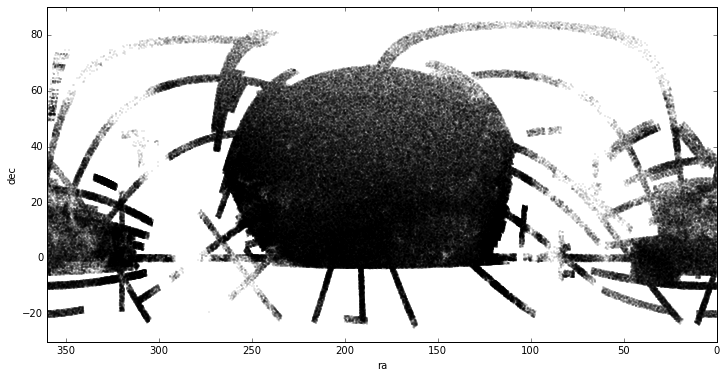

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.DataFrame(rows.as_ndarray())
data.plot(kind='scatter', x='ra', y='dec', s=0.01, figsize=(12, 6), xlim=(360, 0), ylim=(-30,90))

... or even better:

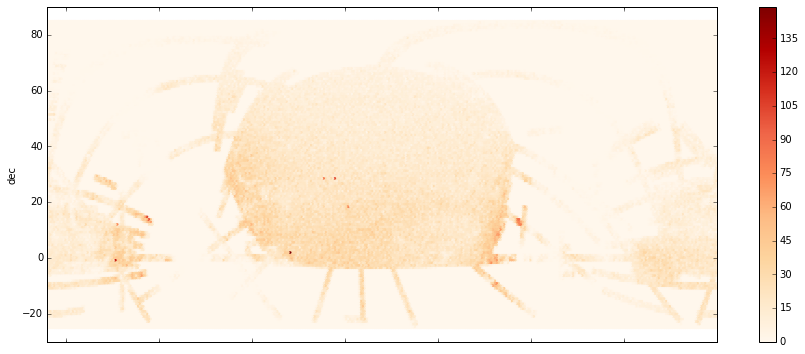

In [105]:
data.plot(kind='hexbin', x='ra', y='dec',
          figsize=(15, 6), gridsize=(360, 120),
          xlim=(360, 0), ylim=(-30,90),
          colormap='OrRd')

At the very least, LSD saves you the work of going to the SDSS archive website, writing a query, downloading the outputs.

It becomes even more useful for more complex examples where the outputs would exceed your SDSS archive quota (0.5 GB), with catalogs that don't offer an SQL interface, or when you need to spatially cross-match multiple catalogs.

### Processing query result piece by piece

If you know the result of a query is likely to be large (i.e., larger than your available RAM), if your algorithm allows it you could process it piecemeal in a `for` loop.

For example, if all we cared about was the number of returned rows, and not their content:

In [106]:
len(data)

575157

instead of calling `.fetch()` you'd call `.iterate(return_blocks=True)`:

In [107]:
query = 'ra, dec, g, r, g-r as gr FROM sdss WHERE (r < 22.5) & (0.3 < gr) & (gr < 0.31)'
data_len = 0
for row_block in db.query(qstr).iterate(return_blocks=True):
    data_len += len(row_block)
print data_len

 [1606 el.]::::::::::::::::::::

575157


>  39.96 sec


This idiom returns subsets of the query (blocks of rows) as they become available (for contrast, `fetch()` accumulates all those subblocks and returns the complete result). This lets you process each block as it becomes available, and discard it immediately afterwords.

In case you're curious, without `return_blocks=True`, the loop would be iterating over *individual rows* (i.e., it becomes similar in behavior to a database cursor in Python's database API). From a performance standpoint, however, that is *terribly* inefficient (it's equivalent to looping over individual elements in a `numpy` array). Don't ever do that if you can avoid it.

Finally, here's a more compact way to write the loop above:

In [108]:
query = 'ra, dec, g, r, g-r as gr FROM sdss WHERE (r < 22.5) & (0.3 < gr) & (gr < 0.31)'
data_len = sum( len(row_block) for row_block in db.query(qstr).iterate(return_blocks=True) )
print data_len

 [1606 el.]::::::::::::::::::::

575157


>  39.62 sec


### Specifying boundaries

In [114]:
import lsd.bounds as b

qstr = 'ra, dec, g, r, g-r as gr FROM sdss WHERE (r < 22.5) & (0.3 < gr) & (gr < 0.31)'

bounds_xy = b.rectangle(180, 10, 181, 11)                 # (ra,dec)_bottomleft, (ra,dec)_topright
# bounds_t  = b.intervalset((53342, 53345), (53346, 53348)) # A set of time intervals (MJD)...
bounds_t  = None                                            # ... or None, if there's no temporal information

rows = db.query(qstr).fetch(bounds=[(bounds_xy, bounds_t)])
len(rows)

 [2 el.]::::::::::::::::::::>  0.85 sec


66

## Advanced Examples: MapReduce and writing MapReduce kernels

Finally, for more advanced examples, designed to scale to terabytes of data, look at the MapReduce API examples on http://lsddb.org